<div style="float:left;"><img src="logo.png" width="500"/></div>

# Introduction to Networks

In this notebook we will look at the basics of using the Python [NetworkX](https://networkx.org) package for network analysis.

Firstly, import the required modules, including NetworkX:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

### Creating Undirected Networks

The most basic NetworkX data structure is a *Graph*, which represents an undirected network. To create an empty network we use:

In [2]:
g = nx.Graph()

We can then start to add nodes and edges to the network. Nodes can be any hashable object, such as a text string, an integer, or a custom node object. We can add one node at a time:

In [3]:
g.add_node("Sarah")
g.add_node("Mark")
g.add_node("Bob")

We can also add multiple nodes at the same time from a list:

In [4]:
g.add_nodes_from(["Lisa", "Mary", "David"])

To access the current nodes in the network:

In [5]:
list(g.nodes())

['Sarah', 'Mark', 'Bob', 'Lisa', 'Mary', 'David']

In [6]:
g.number_of_nodes()

6

Currently there are no edges connecting these nodes. We can easily add undirected edges by specifiying the pair of nodes:

In [7]:
g.add_edge( "Mark", "Bob" )
g.add_edge( "Lisa", "Sarah" )
g.add_edge( "Colm", "Sarah" )
g.add_edge( "Bob", "Colm" )

As with adding nodes, we can add multiple edges at once by specifying a list of pairs as tuples:

In [8]:
pairs = [ ("Mary", "David"), ("Mark", "Mary"), ("Lisa", "Colm"), ("Bob", "Lisa"), ("Colm","David") ]
g.add_edges_from( pairs )

To access the current edges in the network:

In [9]:
list(g.edges())

[('Sarah', 'Lisa'),
 ('Sarah', 'Colm'),
 ('Mark', 'Bob'),
 ('Mark', 'Mary'),
 ('Bob', 'Colm'),
 ('Bob', 'Lisa'),
 ('Lisa', 'Colm'),
 ('Mary', 'David'),
 ('David', 'Colm')]

In [10]:
g.number_of_edges()

9

If we create an edge involving a node that is not already in the network, it will automatically be added to the network.

In [11]:
g.add_edge("Mary", "Robert")

For any node, we can find the list of other nodes connected to it via an edge using the *neighbors()* fuction.

In [12]:
list(g.neighbors("Mary"))

['David', 'Mark', 'Robert']

We can check if a node or an edge exists in a network:

In [13]:
"David" in g

True

In [14]:
"Alison" in g

False

In [15]:
("Mary", "Robert") in g.edges

True

In [16]:
("Sarah", "Robert") in g.edges

False

We can draw a simple diagram of the network to inspect it. We will focus on network visualisation in more detail later in the module.

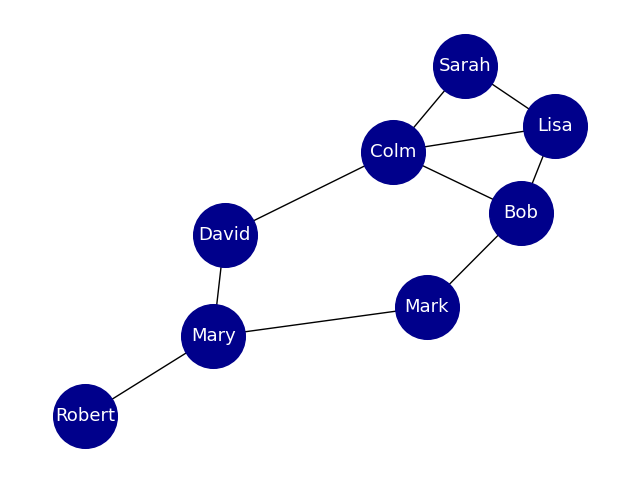

In [17]:
plt.figure(figsize=(8,6))
plt.margins(0.1, 0.1)
nx.draw(g, with_labels=True, node_color='darkblue', node_size=2100, font_color='white', font_size=13)

In certain types of networks we might have **self-loops** - cases where an edge exists between a node and itself.

In [18]:
g.add_edge("Robert", "Robert")
list( g.neighbors("Robert") )

['Mary', 'Robert']

Removing nodes or edges has similar syntax to adding them. They can be removed individually or in batch. Note that attempting to remove a node or edge that does not exist will raise an exception.

In [19]:
g.remove_node("Robert")
g.nodes()

NodeView(('Sarah', 'Mark', 'Bob', 'Lisa', 'Mary', 'David', 'Colm'))

In [20]:
g.remove_nodes_from(["Bob","Lisa"])
g.nodes()

NodeView(('Sarah', 'Mark', 'Mary', 'David', 'Colm'))

In [21]:
g.remove_edge("Mark", "Mary")
g.edges()

EdgeView([('Sarah', 'Colm'), ('Mary', 'David'), ('David', 'Colm')])

Draw the final network:

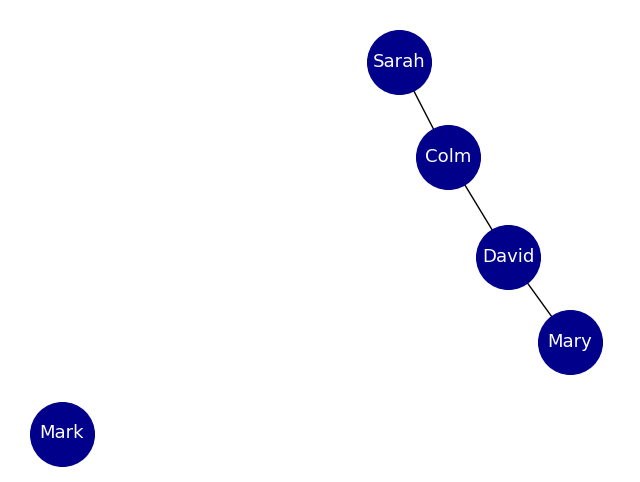

In [22]:
plt.figure(figsize=(8,6))
plt.margins(0.1, 0.1)
nx.draw(g, with_labels=True, node_color='darkblue', node_size=2100, font_color='white', font_size=13)

### Directed Networks

A **directed network** is a set of nodes connected by edges, where the edges have a direction associated with them. In NetworkX, this type of network is implemented as a *DiGraph* object. As with undirected networks, we call the *add_edge()* function. But now the order of the nodes matters.

In [23]:
g = nx.DiGraph()
g.add_edge("Dublin", "Madrid")
g.add_edge("Dublin", "Rome")
g.add_edge("Madrid", "Dublin")
g.add_edge("London", "Dublin")
g.add_edge("Rome", "Dublin")
g.add_edge("Rome", "London")

In [24]:
g.number_of_nodes()

4

In [25]:
list(g.nodes())

['Dublin', 'Madrid', 'Rome', 'London']

In [26]:
g.number_of_edges()

6

In [27]:
list(g.edges())

[('Dublin', 'Madrid'),
 ('Dublin', 'Rome'),
 ('Madrid', 'Dublin'),
 ('Rome', 'Dublin'),
 ('Rome', 'London'),
 ('London', 'Dublin')]

Again, we can produce a quick diagram displaying the network:

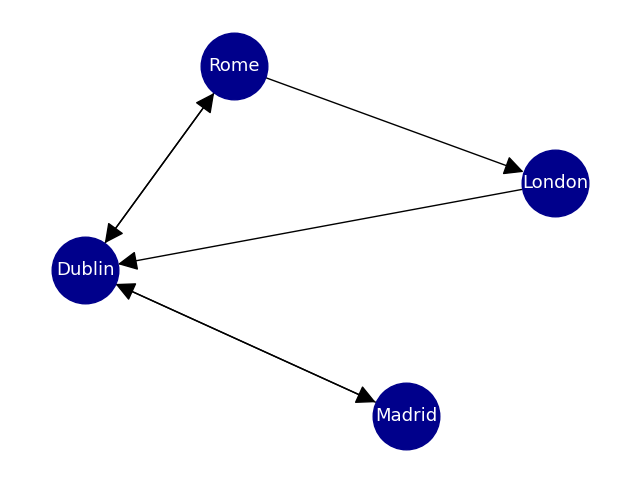

In [28]:
plt.figure(figsize=(8,6))
plt.margins(0.1, 0.1)
nx.draw(g, with_labels=True, node_color='darkblue', node_size=2300, arrowsize=30,
        font_color='white', font_size=13)

We can measure the **reciprocity** of this network - i.e. the fraction of reciprocated edges (edges pointing in both directions ):

In [29]:
nx.reciprocity(g)

0.6666666666666666

In a directed network, we can access the **predecessors** of each node *x* -- the set of nodes which have an edge that ends at *x*. Again this function returns an iterator:

In [30]:
for node in g.predecessors("Dublin"):
    print(node)

Madrid
London
Rome


We can also access the **successors** of each node *x* -- the set of nodes which have an edge that starts at *x*. This gives the same output as *neighbors()* for a directed network.

In [31]:
for node in g.successors("Dublin"):
    print(node)

Madrid
Rome


In [32]:
for node in g.neighbors("Dublin"):
    print(node)

Madrid
Rome


Some network analysis algorithms only work with undirected networks. To convert a directed network to an undirected network, use *to_undirected()*. This creates a copy of the original network, where the edges no longer have direction. Note that the new network does not have duplicate edges.

In [33]:
g2 = g.to_undirected()
g2.edges()

EdgeView([('Dublin', 'Madrid'), ('Dublin', 'Rome'), ('Dublin', 'London'), ('Rome', 'London')])

In [34]:
g2.number_of_edges()

4

Get a Python list containing the edge pairs:

In [35]:
list(g2.edges())

[('Dublin', 'Madrid'),
 ('Dublin', 'Rome'),
 ('Dublin', 'London'),
 ('Rome', 'London')]

Let's draw the undirected network. Notice there are no longer any arrows on the edges (i.e. they have no direction).

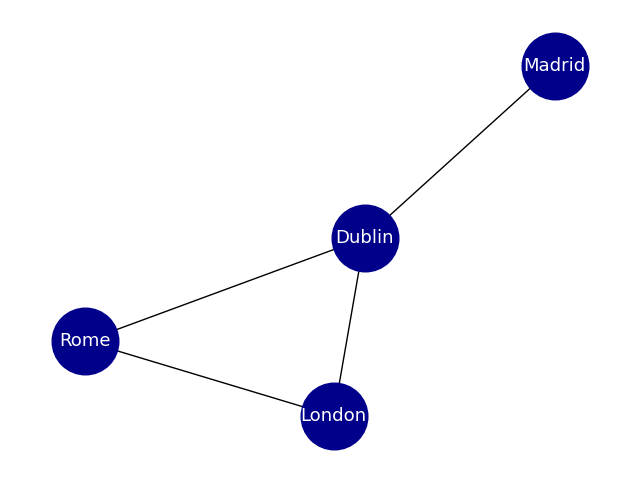

In [36]:
plt.figure(figsize=(8,6))
plt.margins(0.1, 0.1)
nx.draw(g2, with_labels=True, node_color='darkblue', node_size=2300, font_color='white', font_size=13)

### Node & Edge Attributes

Attributes are values associated with the nodes or edges of a network - e.g. a descriptive label or piece of metadata describing a particular node or edge.

We can add one or more **node attributes** when we add a node to a network with *add_node()*. We do not need to pre-specify all possible node attributes when creating a network. Both syntaxes below have the same effect:

In [37]:
g = nx.Graph()
g.add_node(1, label="Ireland", population=4.77)
g.add_node(2, label="Spain", population=46.56)
g.add_node(3, label="Italy", capital="Rome")

Alternatively, we can use *g.node* like a dictionary to set attribute values for an existing node:

In [38]:
g.nodes[1]["capital"] = "Dublin"
g.nodes[2]["capital"] = "Madrid"

This approach can also be used to modify node attributes:

In [39]:
g.nodes[1]["population"] = 4.8

We can also view the attributes associated with each node using *g.node*:

In [40]:
g.nodes[1]

{'label': 'Ireland', 'population': 4.8, 'capital': 'Dublin'}

To iterate over all of the nodes in a network, with access to attributes:

In [41]:
for x in g.nodes(data=True):
    print( x )

(1, {'label': 'Ireland', 'population': 4.8, 'capital': 'Dublin'})
(2, {'label': 'Spain', 'population': 46.56, 'capital': 'Madrid'})
(3, {'label': 'Italy', 'capital': 'Rome'})


In [42]:
for x in g.nodes(data=True):
    print("Capital of %s is %s" % ( x[1]["label"], x[1]["capital"]))

Capital of Ireland is Dublin
Capital of Spain is Madrid
Capital of Italy is Rome


We can also get a dictionary which maps each node ID to values for a specific attributed:

In [43]:
# get every value for the attribute 'population'
nx.get_node_attributes(g, "population")

{1: 4.8, 2: 46.56}

Similarly to node attributes, we can assign **edge attributes** either when creating an edge or after the edge has been created. Both syntaxes below have the same effect:

In [44]:
g.add_edge(1, 2, created_at="15/03/2017")
g.add_edge(1, 3, created_at="22/01/2017")

To iterate over all edges and edge attributes, we call *g.edges()* and specify *data=True*:

In [45]:
for x in g.edges(data=True):
    print(x)

(1, 2, {'created_at': '15/03/2017'})
(1, 3, {'created_at': '22/01/2017'})


We can directly access the edges in a network data structure using subscript notation.

In [46]:
# access all edges associated with node 1
g[1]

AtlasView({2: {'created_at': '15/03/2017'}, 3: {'created_at': '22/01/2017'}})

### Weighted Networks

In a weighted network, the ties or edges between nodes have weights assigned to them indicating the strength of the connection.

In NetworkX, we typically assign edge weights by setting an attribute named *weight* for each edge to an integer or float value. 

In [47]:
g = nx.Graph()
g.add_nodes_from(["A", "B", "C", "D", "E"])

In [48]:
g.add_edge("A", "B", weight=3)
g.add_edge("A", "C", weight=8)
g.add_edge("B", "C", weight=1)
g.add_edge("C", "D", weight=6)
g.add_edge("D", "A", weight=7)
g.add_edge("D", "E", weight=10)
g.add_edge("E", "A", weight=1)

Once created, these appear like any other edge attribute:

In [49]:
list(g.edges(data=True))

[('A', 'B', {'weight': 3}),
 ('A', 'C', {'weight': 8}),
 ('A', 'D', {'weight': 7}),
 ('A', 'E', {'weight': 1}),
 ('B', 'C', {'weight': 1}),
 ('C', 'D', {'weight': 6}),
 ('D', 'E', {'weight': 10})]

We could filter the edges to only look at those above a specified weight threshold:

In [50]:
[(u,v) for (u,v,d) in g.edges(data=True) if d['weight'] > 5 ]

[('A', 'C'), ('A', 'D'), ('C', 'D'), ('D', 'E')]

Now we will draw the weighted network with NetworkX, displaying both the node labels and edge labels (i.e. the values of the weights on the edges)

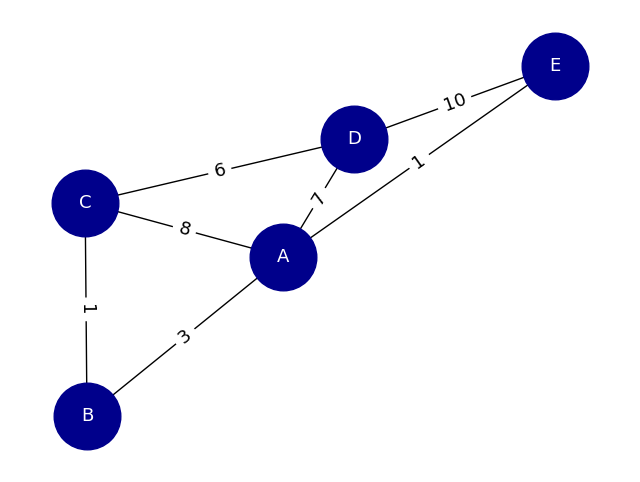

In [51]:
plt.figure(figsize=(8,6))
plt.margins(0.1, 0.1)
# calculate the node positions in advance
pos = nx.spring_layout(g)
# draw the nodes and edges
nx.draw(g, pos=pos, with_labels=True, node_color='darkblue', node_size=2300, font_color='white', font_size=13)
# now draw the edge labels
labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels, font_size=13);

We can use the same approach to create **weighted directed networks**:

In [52]:
g = nx.DiGraph()
g.add_nodes_from(["A", "B", "C", "D"])

In [53]:
g.add_edge("A", "B", weight=10)
g.add_edge("B", "A", weight=40)
g.add_edge("B", "C", weight=10)
g.add_edge("C", "D", weight=30)
g.add_edge("D", "C", weight=5)
g.add_edge("D", "B", weight=50)

Note in a directed network that edges between the same nodes going in different directions can have different edge weights:

In [54]:
for e in g.edges(data=True):
    print(e)

('A', 'B', {'weight': 10})
('B', 'A', {'weight': 40})
('B', 'C', {'weight': 10})
('C', 'D', {'weight': 30})
('D', 'C', {'weight': 5})
('D', 'B', {'weight': 50})
